In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # creating visualizations their management
from wordcloud import WordCloud      #for word clouds
import seaborn as sns                #for visualizations
import neattext as nt                #for text cleaning

### **Reading the Data**

In [2]:
df=pd.read_csv('RAW_recipes.csv')
df.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


### **Data Preparation**

In [4]:
df['ingredients']=df['ingredients'].apply(lambda x:''.join(x.split(',')))
df['ingredients']=df['ingredients'].apply(lambda x:nt.remove_special_characters(x))

In [9]:
df['ingredients'][100]

'cucumber potato chopped tomato plain yogurt chat masala paprika salt'

---
### 20 Most Common Ingredients
---

In [5]:
ingredients=''.join(df['ingredients'])  #creating copra of ingredients

In [9]:
from collections import Counter   #module for counting occurences of an item

In [10]:
cnt=Counter()  #creating obeject of counter
cnt.update(ingredients.split())   #counting occurrence of each ingredient

In [11]:
cnt=cnt.most_common(20)   #selecting most common item occurence

In [12]:
x=[i[0] for i in cnt]
y=[i[1] for i in cnt]

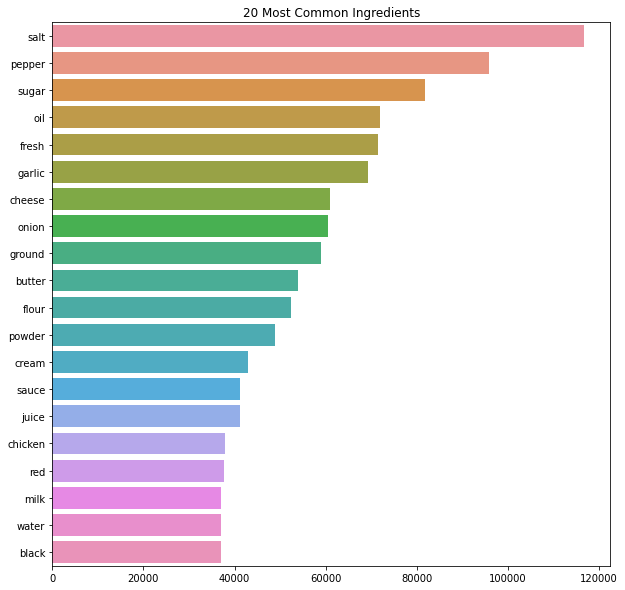

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x,orient="h" )
plt.title("20 Most Common Ingredients");

### **Word Cloud**

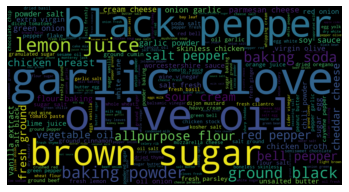

In [18]:
wordcloud = WordCloud(width=1500, height=800).generate(ingredients)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
----

---
# **Method 1: Cosine Similarity**
---

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer    #importing tf-idf for text vectorizer
from sklearn.metrics.pairwise import cosine_similarity         #importing cosine similarity for text similarity
# initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

In [4]:
def get_similar_recipe(ingredients,input_ingdnt):
    # fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform([ingredients, input_ingdnt])
    # compute cosine similarity between the documents
    cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1]).flatten()
    return cosine_similarities[0]*100

### **Input Ingredients**

In [10]:
indgnt=input()

cucumber potato chopped tomato plain yogurt chat masala paprika salt


### **Note**
It will take some time to complete its processing for each request due to huge amount of data, please bear it
### **Alternate**
Method No. 2

In [25]:
df['similarity']=df['ingredients'].apply(lambda x:get_similar_recipe(x,indgnt))

### **Results**

In [26]:
df.sort_values(by=['similarity'],ascending=False)[['ingredients','name','tags','n_steps','steps','description','similarity']][0:10]

,ingredients,name,tags,n_steps,steps,description,similarity
0,winter squash mexican seasoning mixed spice ho...,arriba baked winter squash mexican style,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,100.000000
98363,cabbage butter seasoning salt pepper olive oil,grilled cabbage by richard,"['30-minutes-or-less', 'time-to-make', 'course...",6,['place each wedge in a separate piece of foil...,who's richard you say? he's one of my dear fr...,40.711465
107508,honey olive oil,honey hair conditioner,"['60-minutes-or-less', 'time-to-make', 'cuisin...",4,['using a small amount at a time work mixture ...,add a beautiful shine to your hair,39.943950
138294,tomatoes flour salt pepper seasoning salt butt...,mom s fried red tomatoes,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['cut tomatoes into thick slices', 'put aside'...","my mom's simple recipe. easy, great and tasty...",39.166294
115741,garlic butter olive oil salt,julia child method of preparing garlic,"['60-minutes-or-less', 'time-to-make', 'course...",8,['remove all the cloves of garlic from the hea...,i didn't learn this method by reading it any o...,38.755726
204062,italian seasoning salt olive oil,super easy flavored oil for bread,"['15-minutes-or-less', 'time-to-make', 'course...",2,"['combine all ingredients', 'use as dip for br...",very good!!!!,38.755726
78843,popcorn butter olive oil salt,ed s homemade microwave buttery popcorn,"['15-minutes-or-less', 'time-to-make', 'course...",9,"['pour popcorn in a paper lunch sack', 'add oi...","after much experimentation, this is my husband...",38.755726
143827,baguette olive oil seasoning salt,nif s quick baguette crisps,"['30-minutes-or-less', 'time-to-make', 'course...",10,"['preheat oven to 350f', 'place baguette slice...",i had half of a baguette left one day after ma...,38.755726
21769,dried garbanzo beans salt olive oil mixed spice,berber spice roasted chickpeas,"['30-minutes-or-less', 'time-to-make', 'course...",15,['if using dried chickpeas: put rinsed chickpe...,local source. i used and recommend this spice ...,36.847993
224396,olive oil mixed greens honey balsamic vinegar ...,warm greens saute,"['15-minutes-or-less', 'time-to-make', 'course...",5,"['heat oil in 10 inch skillet', 'add greens', ...",this side dish is a favorite of ours.,36.847993


---------
-----------

---
# 2nd Method: K-Nearest Neighbors Classifier
---

### **Recommendation System:**
K-Nearest Neighbors (KNN) algorithm is a simple and effective machine learning model used in recommendation systems. It can be used for content-based filtering and collaborative filtering, handling large and complex datasets, and providing accurate recommendations. KNN does not assume any underlying distribution of data and can be combined with other algorithms to improve performance. It is widely used in e-commerce, social media, and music streaming, and content recommendation systems, helping users find relevant items and improving business metrics. Overall, KNN is an important tool in the field of recommendation systems.

---
# **Model Development**
---

In [5]:
from sklearn.neighbors import NearestNeighbors #importing NearestNeighbors

In [6]:
knn=NearestNeighbors()            #creating object of knn

In [7]:
# initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

In [8]:
X=vectorizer.fit_transform(df['ingredients'])   #vectorizer the text in ingredients

In [9]:
# Train KNN model
k = 10 # number of nearest neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=10)

### **Taking Ingredients as Input from User**

In [16]:
input_ing=input()

cucumber potato chopped tomato plain yogurt chat masala paprika salt


In [17]:
x=vectorizer.transform([input_ing])   #vectorizing input ingredients

In [18]:
similiarity, indices = knn_model.kneighbors(x, n_neighbors=10)   #getting 10 similar ingredients

### **Results**

In [22]:
df.iloc[indices.flatten()[:]][['ingredients','name','tags','n_steps','steps','description']]

,ingredients,name,tags,n_steps,steps,description
100,cucumber potato chopped tomato plain yogurt ch...,tide me over indian chaat simple veggie salad,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['toss everything well in a serving bowl', 'gr...",this version of the famous indian chaat (prono...
165336,potatoes vegetable oil salt lemon juice scalli...,potatoes with chaat masala,"['60-minutes-or-less', 'time-to-make', 'course...",5,"['preheat oven to 450 degrees', 'combine potat...","these are very good, low-fat potatoes. you can..."
148672,orange juice cocacola chat masala salt ice,orange bloom,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients'],orange juice with a twist
47135,chickpeas coarse sea salt chat masala olive oi...,chickpea poppers,"['60-minutes-or-less', 'time-to-make', 'prepar...",22,"['heat the oven to 425 degrees f', 'drain the ...","found this in our local newspaper, the orlando..."
179819,allpurpose flour oil water potatoes cumin seed...,samosas indian savoury pies,"['weeknight', 'time-to-make', 'course', 'main-...",30,"['---the dough---', 'mix and rub oil into the ...",posted in answer to a request. it seems a litt...
38453,canned chickpeas onion salt potatoes tomatoes ...,channa chaat,"['60-minutes-or-less', 'time-to-make', 'course...",12,"['rinse chickpeas and place in a large bowl', ...",this is a traditional recipe originally from p...
4177,curds potatoes mint leaves green chili ground ...,aloo ka raita potatoes in yogurt,"['15-minutes-or-less', 'time-to-make', 'course...",7,"['add the salt , pepper powder , chaat masala ...",i tasted this raita at a lunch party and just ...
38428,chana potato tomatoes coriander leaves green c...,chana chickpeas chaat,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['boil and cut the potato into cubes', 'finely...",from the
67952,cucumber salt plain yogurt chili powder ground...,cucumber raita super simple quick and easy,"['60-minutes-or-less', 'time-to-make', 'course...",5,['drain the grated cucumber well so that you s...,another adapted recipe from one of my favourit...
187686,potatoes salt oil coriander powder chat masala...,sindhi aloo potato took,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['peel potatoes and cut into large cubes', 'po...",this is one of our traditional (sindhi) specia...


---
---

In [12]:
from googletrans import Translator

metrics = [
    "Sales by Region",
    "Monthly Revenue",
    "Yearly Sales Trends",
    "Top Selling Products",
    "Daily Web Traffic",
    "Website Bounce Rates",
    "Monthly Expenses",
    "Yearly Budget",
    "Cash Flow Analysis",
    "Balance Sheet",
    "Financial Ratios",
    "Inventory Turnover",
    "Sales Forecasting",
    "Website Heatmap",
    "User Demographics",
    "Customer Churn Rates",
    "Brand Reputation",
    "Email Open Rates",
    "Cost Per Acquisition",
    "Cost Per Click",
    "Cost Per Impression",
    "Ad Conversion Rates",
    "Email Marketing ROI",
    "Mobile App Downloads",
    "App Store Rankings",
    "App Retention Rates",
    "App Usage by Feature",
    "App User Behavior",
    "App Monetization",
    "E-commerce Metrics",
    "Average Order Value",
    "Email List Growth",
    "Product Performance",
    "Brand Positioning",
    "Consumer Price Index",
    "Unemployment Rate",
    "Inflation Rate",
    "Manufacturing Index",
    "Retail Sales Index",
    "Interest Rates",
    "Exchange Rates",
    "Oil Prices",
    "Commodity Prices",
    "Demographic Analysis",
    "Population Growth",
    "Migration Patterns",
    "Income Distribution",
    "Education Levels",
    "Healthcare Trends",
    "Environmental Impact",
    "Corporate Governance",
    "Investor Relations",
    "Dividend Yield",
    "Earnings per Share",
    "Debt-to-Equity Ratio",
    "Return on Equity",
    "Profit Margin",
    "Return on Assets",
    "Net Income",
    "Asset Turnover",
    "Current Ratio",
    "Quick Ratio",
    "Working Capital",
    "Free Cash Flow",
    "Net Promoter Score",
    "Product Mix Analysis",
    "Purchasing Metrics"
]

languages = ['en', 'es', 'fr', 'de', 'it', 'pt', 'ja', 'ko', 'zh-cn', 'ru']

translator = Translator()

translations = {}

for lang in languages:
    try:
        translations[lang] = [translator.translate(metric, dest=lang).text for metric in metrics]
    except:
        pass
    
print(translations)


{}
